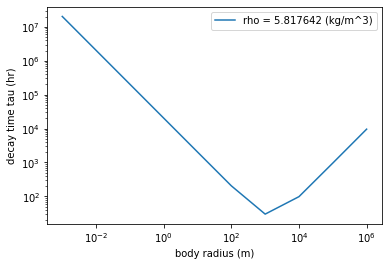

In [1]:
### calculate decay time scales for lunar particles
# based on Adachi et al (1976) formulation
import math
import numpy as np
import matplotlib.pyplot as plt

const1=10.5#10 to 11; 10.55 (fiducial)
const2=0.86#0.85 to 0.9; 0.86 (fiducial)
const3=1e38 #0.9e35 (fiducial) / 1.5e33 (underestimate) / 1.1e37 (cross) / 1e38 (overestimate)
const4=-5.1 #-4.7 (fiducial) / -4.5 (underestimate) / -5 (cross) / -5.1 (overestimate)

dens = 3000. #kg/m^3
xMoon = 20E6 #m
z0=0 #initial z position of moonlet in m
percentSubKep = .95
brad = np.asarray([1e-3,1e-2,.1,1.,10.,1e2,1e3,1e4,1e5,1e6]) #m
Mass_syn = 5e24 #kg
G_hr=(6.674e-11)*(3600**2) #gravitational constant converted to m^3 kg^-1 hr^-2

masses = 4.*math.pi*dens*(brad**3)/3. #kg
z_s=const1*(xMoon**const2) #scale height fit in m
rho_g=const3*(xMoon**const4)*np.exp(-(z0/z_s)**2)
vKep = np.sqrt(G_hr*Mass_syn/xMoon) #m/hr
v_g = percentSubKep*vKep #m/s gas velocity; 0.95 = v_gas/v_kep
eta = 0.5*(1. - (percentSubKep**2)) #parameter relating gas and Keplerian velocity, pressure/temp related
w_K = vKep/xMoon #angular velocity in hr^-1
Tper = np.sqrt((xMoon**3)*4.*(math.pi**2)/(G_hr*Mass_syn)) #orbital period in hr
v_r = -v_g + vKep #m/hr; relative vel bet gas and particle; u = v_r since there are no y or z components to the gas or particle
drag = math.pi*brad*brad*rho_g*v_r/masses #m/hr^2
gvar = drag/w_K #g parameterization
t_spiral = Tper*(1. + gvar*gvar)/(4.*math.pi*eta*gvar) #hr
#print(t_spiral)

plt.figure()
plt.loglog(brad,t_spiral,label='rho = %f (kg/m^3)' %rho_g)
plt.xlabel('body radius (m)')
plt.ylabel('decay time tau (hr)')
plt.legend()
plt.show()
plt.close()